In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
card_local = pd.read_csv('card_local.txt')
card_local['날짜'] = pd.to_datetime(card_local['날짜'], format='%Y%m%d')

In [3]:
cl_dates = card_local.groupby('날짜').카드이용금액계.sum().reset_index()

In [4]:
cl_dates['Rolling Average'] = cl_dates['카드이용금액계'].rolling(7).mean()

In [5]:
cl_dates['30-Day Rolling Average'] = cl_dates['카드이용금액계'].rolling(30).mean()

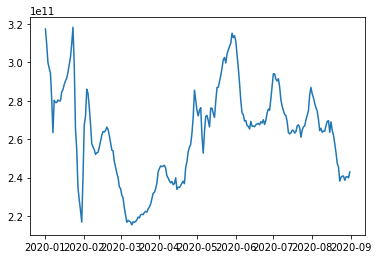

In [6]:
plt.plot(cl_dates.loc[cl_dates.날짜 >= datetime(2020,1,1)]['날짜'], cl_dates.loc[cl_dates.날짜 >= datetime(2020,1,1)]['Rolling Average'])

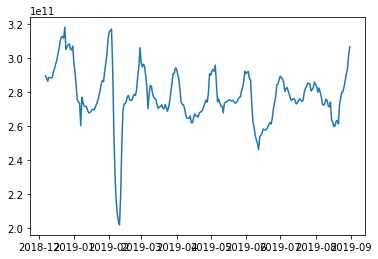

In [7]:
plt.plot(cl_dates.loc[cl_dates.날짜 <= datetime(2019,8,31)]['날짜'], cl_dates.loc[cl_dates.날짜 <= datetime(2019,8,31)]['Rolling Average'])

In [8]:
cases = pd.read_csv('WHO-COVID-19-global-data.csv', header = 0, names = ['Date_reported', 'Country_code', 'Country', 'WHO_region',
       'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'])

In [9]:
cases = cases.loc[cases['Country_code'] == 'KR'].reset_index()

In [10]:
cases['Date_reported'] = pd.to_datetime(cases['Date_reported'])

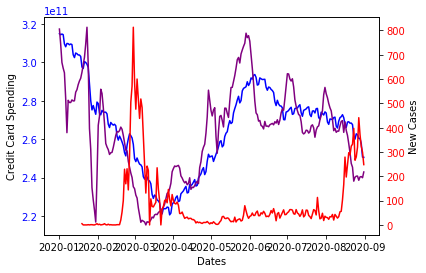

In [11]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Dates')
ax1.set_ylabel('Credit Card Spending')
ax1.plot(cl_dates.loc[cl_dates.날짜 >= datetime(2020,1,1)]['날짜'], cl_dates.loc[cl_dates.날짜 >= datetime(2020,1,1)]['30-Day Rolling Average'], color = 'blue')
ax1.plot(cl_dates.loc[cl_dates.날짜 >= datetime(2020,1,1)]['날짜'], cl_dates.loc[cl_dates.날짜 >= datetime(2020,1,1)]['Rolling Average'], color = 'purple')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

ax2 = ax1.twinx()
ax2.set_ylabel('New Cases')
ax2.plot(cases.loc[cases['Date_reported'] <= datetime(2020,8,31)]['Date_reported'], cases.loc[cases['Date_reported'] <= datetime(2020,8,31)]['New_cases'], color = 'red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

plt.show()

In [12]:
cl_dates_2020 = cl_dates.loc[cl_dates['날짜'] >= datetime(2020,1,1)].reset_index(drop=True)
cl_dates_2020.loc[cl_dates_2020['날짜'] == datetime(2020,2,28),'Rolling Average'] = np.mean(np.append(cl_dates_2020.loc[cl_dates_2020['날짜'] == datetime(2020,2,28)]['Rolling Average'].values,
cl_dates_2020.loc[cl_dates_2020['날짜'] == datetime(2020,2,29)]['Rolling Average'].values))
cl_dates_2020.loc[cl_dates_2020['날짜'] == datetime(2020,2,28),'30-Day Rolling Average'] = np.mean(np.append(cl_dates_2020.loc[cl_dates_2020['날짜'] == datetime(2020,2,28)]['30-Day Rolling Average'].values,
cl_dates_2020.loc[cl_dates_2020['날짜'] == datetime(2020,2,29)]['30-Day Rolling Average'].values))
cl_dates_2020 = cl_dates_2020.loc[cl_dates_2020['날짜'] != datetime(2020,2,29)].reset_index(drop=True)

In [14]:
cl_dates_2020['Difference'] = cl_dates_2020.iloc[:,1] - cl_dates.iloc[31:,1].reset_index(drop=True)

In [15]:
cl_dates_2020['7-Day Rolling Average Difference'] = cl_dates_2020.iloc[:,2] - cl_dates.iloc[31:,2].reset_index(drop=True)

In [16]:
cl_dates_2020['30-Day Rolling Average Difference'] = cl_dates_2020.iloc[:,3] - cl_dates.iloc[31:,3].reset_index(drop=True)

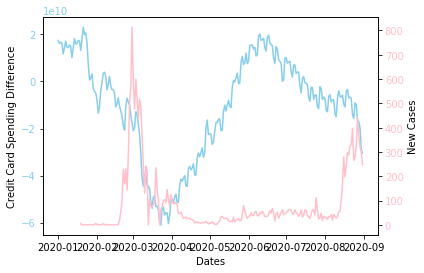

In [17]:
fig, ax1 = plt.subplots()
color = 'skyblue'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Credit Card Spending Difference')
ax1.plot(cl_dates_2020['날짜'], cl_dates_2020['30-Day Rolling Average Difference'], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

color = 'pink'
ax2 = ax1.twinx()
ax2.set_ylabel('New Cases')
ax2.plot(cases.loc[cases['Date_reported'] <= datetime(2020,8,31)]['Date_reported'], cases.loc[cases['Date_reported'] <= datetime(2020,8,31)]['New_cases'], color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

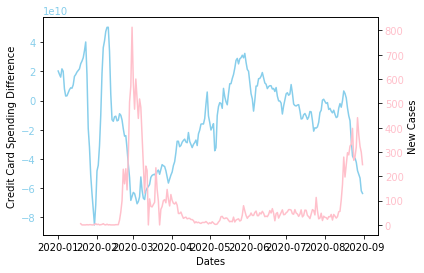

In [18]:
fig, ax1 = plt.subplots()
color = 'skyblue'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Credit Card Spending Difference')
ax1.plot(cl_dates_2020['날짜'], cl_dates_2020['7-Day Rolling Average Difference'], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

color = 'pink'
ax2 = ax1.twinx()
ax2.set_ylabel('New Cases')
ax2.plot(cases.loc[cases['Date_reported'] <= datetime(2020,8,31)]['Date_reported'], cases.loc[cases['Date_reported'] <= datetime(2020,8,31)]['New_cases'], color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

In [19]:
cl_dates_2020.drop(['카드이용금액계', 'Rolling Average', '30-Day Rolling Average'], 1, inplace=True)

In [20]:
cl_dates_2020.to_csv('cl_daily.txt', index=False)